In [1]:
!pip install Sastrawi
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re
import string
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/penyisihan-datavidia-7-0/sample_submission.csv
/kaggle/input/penyisihan-datavidia-7-0/train.csv
/kaggle/input/penyisihan-datavidia-7-0/test.csv


# **Load Dataset**

In [4]:
train = pd.read_csv("/kaggle/input/penyisihan-datavidia-7-0/train.csv")
test = pd.read_csv("/kaggle/input/penyisihan-datavidia-7-0/test.csv")
ss = pd.read_csv("/kaggle/input/penyisihan-datavidia-7-0/sample_submission.csv")

In [22]:
train.head()

,review_id,review_text,category,selected_text
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pe...",1,penginapannya rapi bersih suasana tenang pelay...
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater...",0,wifi kamar tersedia heater kopiteh dispenser t...
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh...",0,lantai kamar mandi kotor bau sdh jdi sarang ny...
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk ti...",0,wc jorok kasur dibersihkan handuk diganti
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0,bocor


In [23]:
test.head()

,review_id,review_text,selected_text
0,7302180ac7160f04a405d8aa7bd6beb8,"Kasur rusak, punggung saya sakit, kasurnya ga ...",kasur rusak punggung sakit kasurnya padat mele...
1,3184c670e170f565c7522eb76a320ba1,gerah,gerah
2,e33abf6bb5d5a9a77c339043b1725dc8,"tempat ridur atas bawah.. ac nya pararel, tdk ...",tempat ridur atas bawah ac pararel air panas c...
3,061d388950340070a6ac03fabc9027b0,"ac kurang dingin, tidak ada snack sperti di foto",ac kurang dingin snack sperti foto
4,e62d87c348674b6c06856964f3ab16b8,Lumayan untuk guest house dengan standart harg...,lumayan guest house standart harga segitu


In [24]:
ss.head()

,review_id,category
0,7302180ac7160f04a405d8aa7bd6beb8,0
1,3184c670e170f565c7522eb76a320ba1,0
2,e33abf6bb5d5a9a77c339043b1725dc8,0
3,061d388950340070a6ac03fabc9027b0,0
4,e62d87c348674b6c06856964f3ab16b8,0


In [25]:
train.isnull().sum()

review_id        0
review_text      0
category         0
selected_text    0
dtype: int64

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14856 entries, 0 to 14855
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      14856 non-null  object
 1   review_text    14856 non-null  object
 2   category       14856 non-null  int64 
 3   selected_text  14856 non-null  object
dtypes: int64(1), object(3)
memory usage: 464.4+ KB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3714 entries, 0 to 3713
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      3714 non-null   object
 1   review_text    3714 non-null   object
 2   selected_text  3714 non-null   object
dtypes: object(3)
memory usage: 87.2+ KB


In [28]:
train.category.value_counts()

0    12839
1     2017
Name: category, dtype: int64

In [29]:
temp = train.groupby('category').count()['review_text'].reset_index().sort_values(by='review_text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,category,review_text
0,0,12839
1,1,2017


In [31]:
train[train["category"] == 0]["review_text"].values[0]

'wifi tidak sampai kamar, tidak tersedia heater untuk kopi/teh atau dispenser dan tidak tersedia kursi di depan kamar untuk merokok hingga harus duduk di lantai'

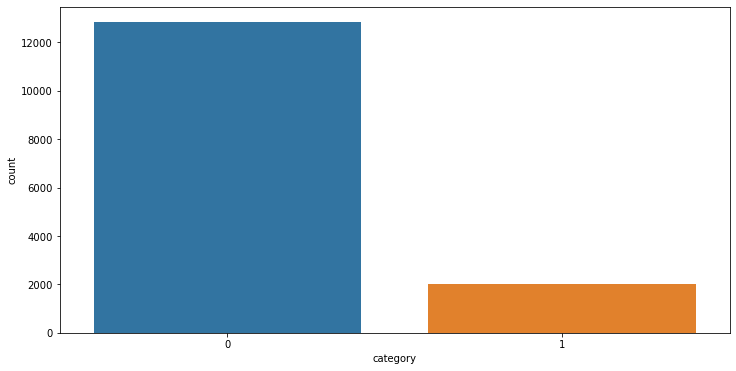

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x='category',data=train)
#ternyata data inbalanced

In [33]:
fig = go.Figure(go.Funnelarea(
    text =temp.category,
    values = temp.review_text,
    title = {"position": "top center", "text": "Funnel-Chart of Category Distribution"}
    ))
fig.show()

In [34]:
train['explore_list'] = train['review_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train['explore_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,kamar,6756
1,tidak,5716
2,dan,5171
3,di,4558
4,ada,4307
5,kurang,3079
6,nya,2495
7,yg,2466
8,mandi,2322
9,air,2112


Masih banyak "kata" yang belum bersih atau tidak mengandung makna

**Normalisasi**

In [ ]:
# normalizad_word = pd.read_csv("../input/dataset-normalisasi/normalisasi.csv")

# normalizad_word_dict = {}

# for index, row in normalizad_word.iterrows():
#     if row[0] not in normalizad_word_dict:
#         normalizad_word_dict[row[0]] = row[1] 

# def normalized_term(document):
#     return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

# train['review_norm'] = train['review_norm'].apply(normalized_term)

# **Preprocessing**

**Clean Text**


Case Folding, Clear Punctuation, Stopword, Tokenization

In [79]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopword_id(text):    
    # Ambil Stopword bawaan
    stop_factory = StopWordRemoverFactory().get_stop_words()
    more_stopword = ['yg','ga','gak', 'tdk','nya','ada','tidak','baik']

    # Merge stopword
    data = stop_factory + more_stopword
    dictionary = ArrayDictionary(data)
    str = StopWordRemover(dictionary)
    text = str.remove(text)
    return text
#     return [word for word in text if word not in stopwords.words('indonesian')]

def remove_stopword_eng(text):
    return [word for word in text if word not in stopwords.words('english')]

def remove_stopword_in(text):    
    # Ambil Stopword bawaan
    stop_factory = StopWordRemoverFactory().get_stop_words()
    more_stopword = ['ada','tidak','baik','yg','ga','gak', 'tdk','nya']

    # Merge stopword
    data = stop_factory + more_stopword
    dictionary = ArrayDictionary(data)
    str = StopWordRemover(dictionary)
    text = str.remove(text)
    return text

def remove_stopword(text):
    text = [word for word in text if word not in stopwords.words('indonesian')]
    text = [word for word in text if word not in stopwords.words('english')]
    return text

def clean_text(text):
    # lower text/case folding
    text = text.lower()
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    #remove multiple whitespace into single whitespace
    text = re.sub('\s+',' ',text)
    #remove puncutation
    text = text.translate(str.maketrans("","",string.punctuation))
    text = word_tokenize(text)
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    text = remove_stopword_eng(text)
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean train dataset and stop word
train["selected_text"] = train["review_text"].apply(lambda x: remove_stopword_id(x))
train["selected_text"] = train["selected_text"].apply(lambda x: clean_text(x))

# clean test dataset and stop word
test["selected_text"] = test["review_text"].apply(lambda x: remove_stopword_id(x))
test["selected_text"] = test["selected_text"].apply(lambda x: clean_text(x))

In [80]:
train["selected_text"] = train["selected_text"].apply(lambda x: remove_stopword_in(x))
test["selected_text"] = test["selected_text"].apply(lambda x: remove_stopword_in(x))

In [35]:
print("After Preprocessing\n", train["selected_text"].head())

After Preprocessing
 0    penginapannya rapi bersih suasana tenang pelay...
1    wifi kamar tersedia heater kopiteh dispenser t...
2    lantai kamar mandi kotor bau sdh jdi sarang ny...
3            wc jorok kasur dibersihkan handuk diganti
4                                                bocor
Name: selected_text, dtype: object


In [36]:
train.head()

,review_id,review_text,category,selected_text,explore_list
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pe...",1,penginapannya rapi bersih suasana tenang pelay...,"[Penginapannya, rapi,, bersih,, suasana, tenan..."
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater...",0,wifi kamar tersedia heater kopiteh dispenser t...,"[wifi, tidak, sampai, kamar,, tidak, tersedia,..."
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh...",0,lantai kamar mandi kotor bau sdh jdi sarang ny...,"[Lantai, kamar, mandi, kotor,, bau,, dan, sepe..."
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk ti...",0,wc jorok kasur dibersihkan handuk diganti,"[Wc, jorok.., Kasur, tidak, dibersihkan,,, han..."
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0,bocor,"[bocor, lagi]"


Stemming

In [ ]:
# # !pip install Sastrawi
# !pip install swifter

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# import swifter


# # create stemmer
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# # stemmed
# def stemmed_wrapper(term):
#     return stemmer.stem(term)

# term_dict = {}

# for document in train['selected_text']:
#     for term in document:
#         if term not in term_dict:
#             term_dict[term] = ' '
            
# print(len(term_dict))
# print("------------------------")

# for term in term_dict:
#     term_dict[term] = stemmed_wrapper(term)
#     print(term,":" ,term_dict[term])
    
# print(term_dict)
# print("------------------------")


# # apply stemmed term to dataframe
# def get_stemmed_term(document):
#     return [term_dict[term] for term in document]

# train['final_text'] = train['selected_text'].swifter.apply(lambda x: get_stemmed_term(x))
# # train["final_text"] = train["selected_text"].apply(lambda x: get_stemmed_term(x))

In [ ]:
# train['final_text'] = train['selected_text'].apply(" ".join)

In [ ]:
# train['final_text'].head()

In [ ]:
# train.to_csv('train_cleaning.csv',index=False)

In [ ]:
# final_clean = pd.DataFrame({'review_id':train['review_id'],'review_text':train['review_text'],'selected_text':train['selected_text'],'final_text':train['final_text'],'category':train['category']})
# final_clean.head()
# filename = 'train_cleaning.csv'

# final_clean.to_csv(filename,index=False)

# print('Saved file: ' + filename)

In [ ]:
# train = pd.read_csv('./train_cleaning.csv')

# **Exploratory Data Analysis (EDA)**

**Visualisasi Setelah Preprocessing**

In [37]:
train['temp_list'] = train['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,kamar,8291
1,kurang,3478
2,mandi,2592
3,air,2459
4,airy,1894
5,bersih,1892
6,sangat,1672
7,ac,1658
8,hotel,1654
9,kotor,1596


In [38]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Final Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [39]:
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,kurang,3478
2,mandi,2592
3,air,2459
4,airy,1894
5,bersih,1892
6,sangat,1672
7,ac,1658
8,hotel,1654
9,kotor,1596
10,bau,1421


In [40]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

**Visualisasi Sebelum Melakukan Preprocessing (Data Raw)**

In [41]:
train['temp_list1'] = train['review_text'].apply(lambda x:str(x).split()) #List of words in every row for text
train['temp_list1'] = train['temp_list1'].apply(lambda x:remove_stopword(x)) #Removing Stopwords

Seperti yang dilihat, data yang belum dilakukan preprocessing menghasilkan "kata" yang tidak seharusnya dipakai dan "kata" tersebut akan dilakukan teknik stopword untuk menghilangkannya.

In [42]:
top = Counter([item for sublist in train['temp_list1'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,nya,2495
2,yg,2466
3,mandi,2322
4,air,2112
5,ga,1681
6,gak,1342
7,tdk,1315
8,airy,1311
9,hotel,1305
10,Kamar,1009


In [43]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Review Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

**Visualisasi berdasarkan pembagian class dalam hal ini category dari dataset train.csv**

In [44]:
# Divide by class
Positive_sent = train[train['category']== 1]
Negative_sent = train[train['category']== 0]

**Visualisasi class positif**

In [45]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,bersih,666
1,kamar,579
2,nyaman,565
3,bagus,307
4,ramah,290
5,hotel,286
6,sangat,284
7,harga,238
8,pelayanan,224
9,dekat,191


In [46]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

**Visualisasi class negatif**

In [47]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')


,Common_words,count
1,kurang,3303
2,mandi,2445
3,air,2321
4,airy,1789
5,kotor,1583
6,ac,1557
7,bau,1392
8,sangat,1388
9,hotel,1368
10,bersih,1226


In [48]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

**Visualisasi Wordcloud**

In [49]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'nya', "airy"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = '/kaggle/input/masks-for-wordclouds/'

**Wordcloud class positif**

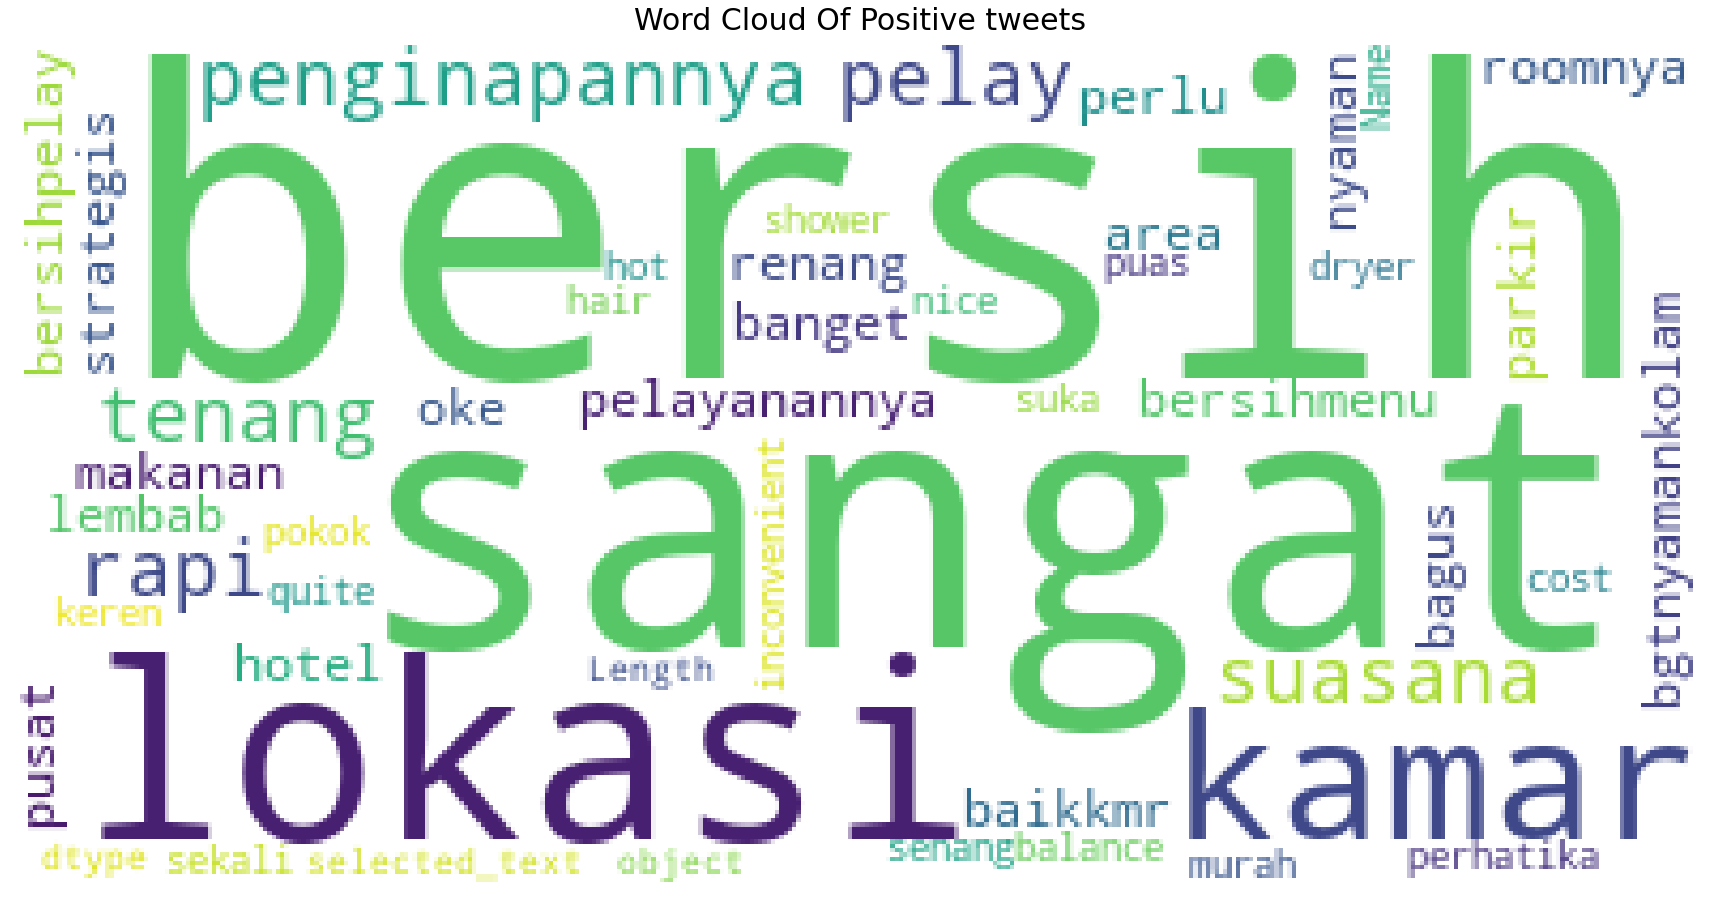

In [50]:
# pos_mask = np.array(Image.open(d+ 'review_mask.png'))
# plot_wordcloud(Positive_sent.selected_text,mask=pos_mask,title="Word Cloud Of Positive tweets",title_size=30)
plot_wordcloud(Positive_sent.selected_text,title="Word Cloud Of Positive tweets",title_size=30)

**Wordcloud class negatif**

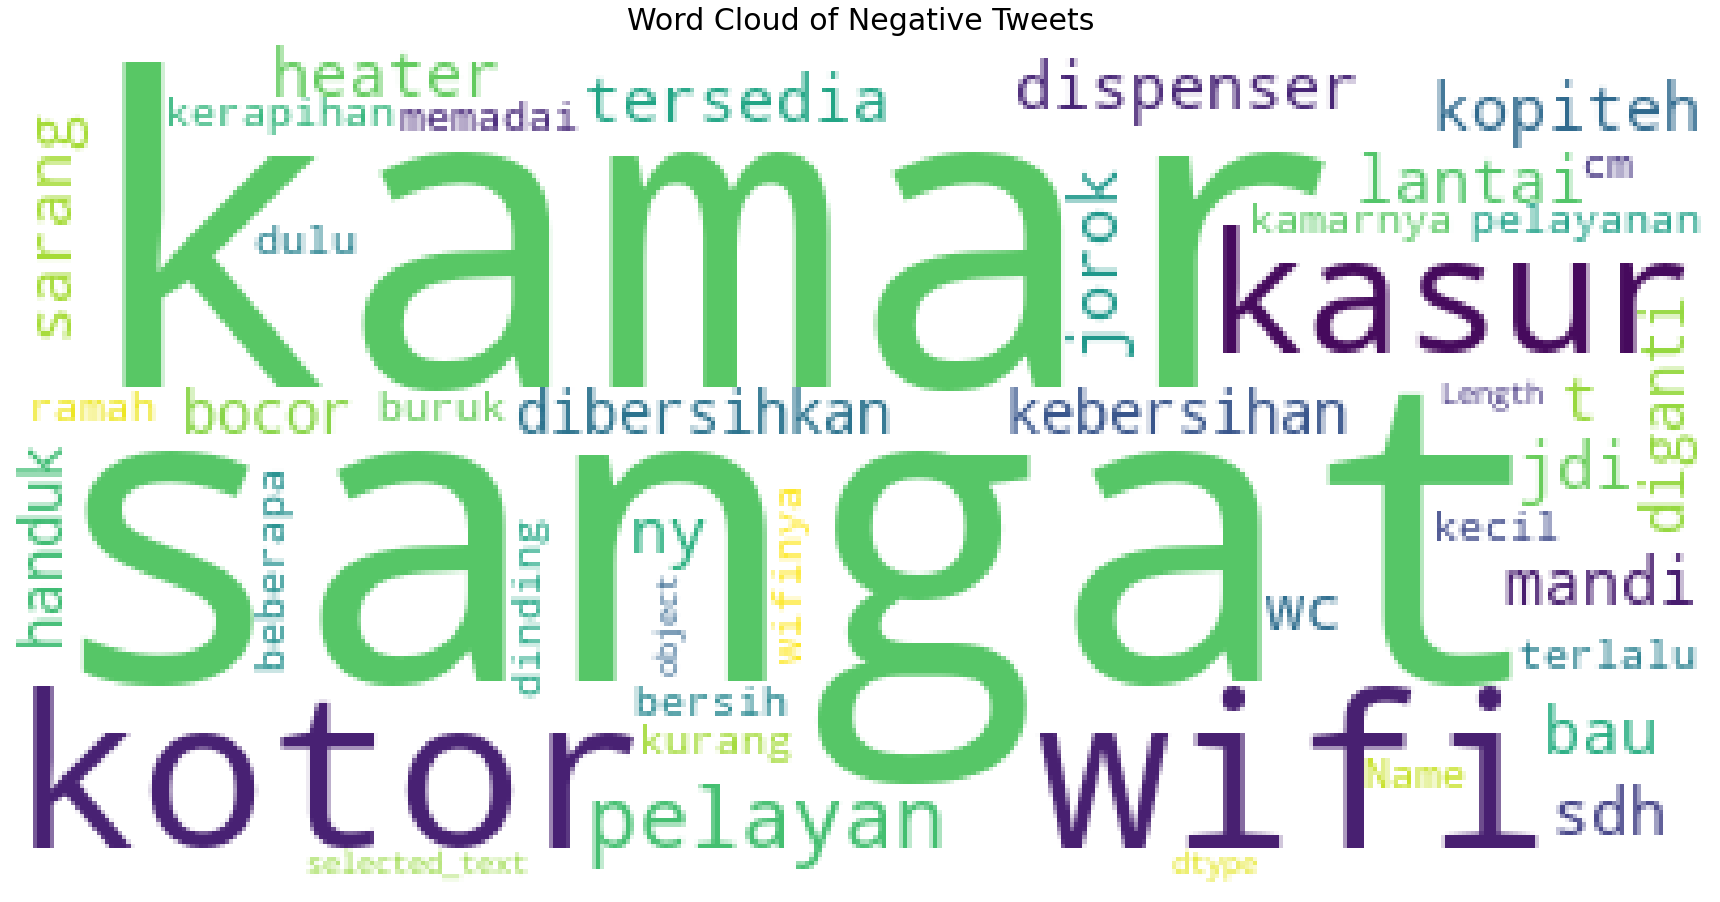

In [51]:
plot_wordcloud(Negative_sent.selected_text,title="Word Cloud of Negative Tweets",color='white',title_size=30)

# **Feature Engineering**

**Imbalanced Dataset**

Seperti yang dilihat sebelumnya, dataset mengalami inbalanced data sehingga kami menggunakan beberapa teknik untuk membuat dataset menjadi balance

In [52]:
# Class count
neg, pos = train.category.value_counts()
total = neg + pos
# Divide by class
Positive_sent = train[train['category']== 1]
Negative_sent = train[train['category']== 0]

**Random under-sampling:**

Random under-sampling:
1    2017
0    2017
Name: category, dtype: int64


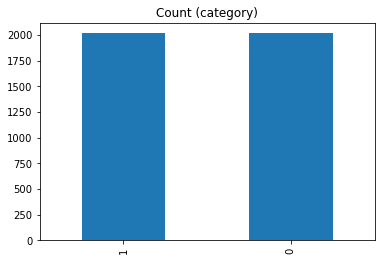

In [53]:
df_neg_under = Negative_sent.sample(pos)
df_test_under = pd.concat([df_neg_under, Positive_sent], axis=0)

print('Random under-sampling:')
print(df_test_under.category.value_counts())

df_test_under.category.value_counts().plot(kind='bar', title='Count (category)');

Jika dilihat dari hasil visualisasinya, jika kita melakukan melakukan under-sampling maka dataset yang akan kita training akan berkurang banyak sehingga besar kemungkinan akan sangat mempengaruhi modelling nanti.

In [54]:
fig = go.Figure(go.Funnelarea(
    text =df_test_under.category,
    values = df_test_under.category.value_counts(),
    title = {"position": "top center", "text": "Random under-sampling"}
    ))
fig.show()

**Random over-sampling**

Random over-sampling:
1    12839
0    12839
Name: category, dtype: int64


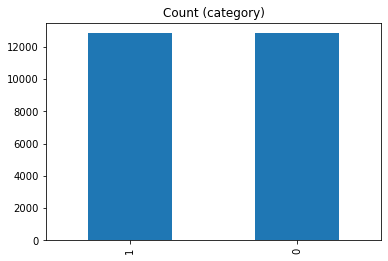

In [55]:
df_pos_over = Positive_sent.sample(neg, replace=True)
df_test_over = pd.concat([Negative_sent, df_pos_over], axis=0)

print('Random over-sampling:')
print(df_test_over.category.value_counts())

df_test_over.category.value_counts().plot(kind='bar', title='Count (category)');

In [56]:
fig = go.Figure(go.Funnelarea(
    text =df_test_over.category,
    values = df_test_over.category.value_counts(),
    title = {"position": "top center", "text": "Random over-sampling"}
    ))
fig.show()

**Class weights**

In [57]:
import sklearn
import numpy as np

# Convert parts into NumPy arrays for weight computation
zero_numpy = Negative_sent['category'].to_numpy()
one_numpy = Positive_sent['category'].to_numpy()
all_together = np.concatenate((zero_numpy, one_numpy))
unique_classes = np.unique(all_together)

# Compute weights
weights = sklearn.utils.compute_sample_weight('balanced', unique_classes, all_together)
print(weights)


[0.57854973 3.68269707]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass indices=[0 0 0 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error



**Analyze class imbalance in the targets**

In [58]:
import numpy as np
counts = np.bincount(train.iloc[:, 2])
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(train)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]


Number of positive samples in training data: 2017 (13.58% of total)


**Feature Extraction**

**Over-sampling**

In [83]:
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.utils import class_weight

#feature extraction
count_vectorizer = feature_extraction.text.CountVectorizer()
train_vectors = count_vectorizer.fit_transform(df_test_over["selected_text"])
test_vectors = count_vectorizer.transform(test["selected_text"])

#split
x_train,x_test,y_train,y_test = train_test_split(train_vectors,df_test_over["category"],test_size=0.33,random_state=1)

**Under-sampling**

In [60]:
train_vectors_under = count_vectorizer.fit_transform(df_test_under["selected_text"])

#split
x_train2,x_test2,y_train2,y_test2 = train_test_split(train_vectors_under,df_test_under["category"],test_size=0.33,random_state=1)

# **Model & Validation**


**K Nearest Neighbors**

In [61]:
from sklearn.neighbors import KNeighborsClassifier
import time
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()

preds = knn.predict(x_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start

scores = model_selection.cross_val_score(knn, x_train, y_train, cv=3, scoring="f1")

print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))
print("Scores: ", scores)

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 91.65
Time consumed for training: 0.004 seconds
Time consumed for prediction: 5.35572 seconds
Scores:  [0.8704891  0.88123862 0.86427916]


**Naive Bayes**

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MaxAbsScaler
scaler_gnb = MaxAbsScaler()
sdss = scaler_gnb.fit_transform(train_vectors)
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(sdss, df_test_over['category'], test_size=0.33)

gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train_gnb.toarray(), y_train_gnb)
training_end = time.perf_counter()
prediction_start = time.perf_counter()

preds = gnb.predict(X_test_gnb.toarray())
prediction_end = time.perf_counter()
acc_gnb = (preds == y_test_gnb).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start

scores = model_selection.cross_val_score(gnb, X_train_gnb.toarray(), y_train, cv=3, scoring="f1")

print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))
print("Scores: ", scores)

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 76.95
Time consumed for training: 4.644 seconds
Time consumed for prediction: 2.28815 seconds
Scores:  [0.61082682 0.62666667 0.58404765]


**XGBoost**

In [63]:
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()

preds = xgb.predict(x_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = model_selection.cross_val_score(xgb, x_train, y_train, cv=cv, scoring="f1")
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))
print("Scores: ", scores)

XGBoost's prediction accuracy is: 90.41
Time consumed for training: 2.174
Time consumed for prediction: 0.08828 seconds
Scores:  [0.91078717 0.91286307 0.90023753 0.90887713 0.91143695 0.90750436
 0.90379009 0.91101945 0.91004673 0.90352941 0.90487515 0.90909091
 0.89622642 0.90898483 0.91294118 0.91491841 0.91079812 0.90023753
 0.90205279 0.91112419 0.91047396 0.91199055 0.90265487 0.90590298
 0.91603053 0.90590298 0.90876986 0.91294118 0.91143695 0.91207503]


**XGBoost - Testing optimal hyperparameters**

Jika dijalankan, akan makan waktu lama

In [ ]:
# xgboost = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
#                         min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

# xgboost.fit(x_train, y_train)
# preds = xgboost.predict(x_test)

# accuracy = (preds == y_test).sum().astype(float) / len(preds)*100
# scores = model_selection.cross_val_score(xgboost, x_train, y_train, cv=cv, scoring="f1")

# print("XGBoost's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))
# print("Scores: ", scores)

**Random Forest Classifier**

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
import time

rfc = RandomForestClassifier(n_estimators=1000,max_features ='log2')
training_start = time.perf_counter()
rfc.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
preds = rfc.predict(x_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
scores = model_selection.cross_val_score(rfc, x_train, y_train, cv=cv, scoring="f1")

print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))
print("Scores: ", scores)

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 98.82
Time consumed for training: 375.775 seconds
Time consumed for prediction: 9.34237 seconds
Scores:  [0.99017909 0.98793797 0.98154556 0.98738532 0.98901099 0.98735632
 0.98265896 0.98732719 0.99136442 0.98963134 0.9862069  0.98907418
 0.98152425 0.98674352 0.98491879 0.98731257 0.99139415 0.98963134
 0.98666667 0.9867892  0.98851894 0.99193548 0.98850575 0.98734177
 0.99188876 0.98609502 0.98732719 0.98966705 0.98273878 0.98847926]


**Random Forest Hyperparameter Tuning**

Idem

In [ ]:
# # example of grid searching key hyperparameters for RandomForestClassifier
# from sklearn.datasets import make_blobs
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # define models and parameters
# model = RandomForestClassifier()
# n_estimators = [10, 100]
# max_features = ['sqrt', 'log2']
# # define grid search
# grid = dict(n_estimators=n_estimators,max_features=max_features)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(x_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

**Random Forest Classifier using the TfidfVectorizer**

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# def vectorize(data,tfidf_vect_fit):
#     X_tfidf = tfidf_vect_fit.transform(data)
#     words = tfidf_vect_fit.get_feature_names()
#     X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
#     X_tfidf_df.columns = words
#     return(X_tfidf_df)

In [ ]:
# def clean(text):
#     wn = nltk.WordNetLemmatizer()
#     stopword = nltk.corpus.stopwords.words('indonesian')
#     tokens = nltk.word_tokenize(text)
#     lower = [word.lower() for word in tokens]
#     no_stopwords = [word for word in lower if word not in stopword]
#     no_alpha = [word for word in no_stopwords if word.isalpha()]
#     lemm_text = [wn.lemmatize(word) for word in no_alpha]
#     clean_text = lemm_text
#     return clean_text

In [ ]:
# #split
# x_trains,x_tests,y_trains,y_tests = train_test_split(df_test_over["selected_text"],df_test_over["category"],test_size=0.33,random_state=1)

# tfidf_vect = TfidfVectorizer(analyzer=clean)
# tfidf_vect_fit=tfidf_vect.fit(x_trains)
# x_train_tf=vectorize(x_trains,tfidf_vect_fit)

In [ ]:
# rf = RandomForestClassifier()
# scores =  model_selection.cross_val_score(rf,x_train_tf,y_trains.values.ravel(),cv=5)
# # scores = model_selection.cross_val_score(rf, x_train_tf, y_train, cv=3, scoring="f1")
# scores

In [ ]:
# feat_importances = pd.Series(rfc.feature_importances_, index=x_tests.columns)
# feat_importances.nlargest(20).plot(kind='bar',figsize=(10,10))
# plt.title("Top 20 important features")
# plt.show()

**Support Vector Machine Classifier**

In [16]:
from sklearn.svm import SVC

svc = SVC(C=10, gamma='scale', kernel='rbf')
training_start = time.perf_counter()
svc.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()

preds = svc.predict(x_test)
prediction_end = time.perf_counter()
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start

scores = model_selection.cross_val_score(svc, x_train, y_train, cv=3, scoring="f1")
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 98.22
Time consumed for training: 55.818 seconds
Time consumed for prediction: 7.33842 seconds


**SVC Hyperparameter Tuning**

In [15]:
# # example of grid searching key hyperparametres for SVC
# from sklearn.datasets import make_blobs
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# # define model and parameters
# model = SVC()
# kernel = ['poly', 'rbf', 'sigmoid']
# C = [50, 10, 1.0, 0.1, 0.01]
# gamma = ['scale']
# # define grid search
# grid = dict(kernel=kernel,C=C,gamma=gamma)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(x_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.980489 using {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.957801 (0.005088) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.978455 (0.004077) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.828818 (0.011010) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.950109 (0.005231) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.980489 (0.003541) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.832810 (0.010556) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.906416 (0.007690) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.961230 (0.004285) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.853987 (0.007131) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.658200 (0.010067) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.862377 (0.006610) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.854181 (0.009206) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.544408 (0.005034) with: {'C': 0.01, 'gamma': 'scale', 

**RidgeClassifier**

In [64]:
from sklearn import linear_model

rc = linear_model.RidgeClassifier(alpha=1.0)
training_start = time.perf_counter()
rc.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()

preds = rc.predict(x_test)
prediction_end = time.perf_counter()
acc_rc = (preds == y_test).sum().astype(float) / len(preds)*100
rc_train_time = training_end-training_start
rc_prediction_time = prediction_end-prediction_start
scores = model_selection.cross_val_score(rc, x_train, y_train, cv=3,scoring="f1")
print("Scikit-Learn's Ridge Classifier's prediction accuracy is: %3.2f" % (acc_rc))
print("Time consumed for training: %4.3f seconds" % (rc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rc_prediction_time))

Scikit-Learn's Ridge Classifier's prediction accuracy is: 92.85
Time consumed for training: 0.155 seconds
Time consumed for prediction: 0.00081 seconds


**Ridge Hyperparameter Tuning**

Idem

In [ ]:
# # example of grid searching key hyperparametres for ridge classifier
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import RidgeClassifier

# # define models and parameters
# model = RidgeClassifier()
# alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# # define grid search
# grid = dict(alpha=alpha)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(x_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

**Stochastic Gradient Boosting**

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
training_start = time.perf_counter()
gbc.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()

preds = gbc.predict(x_test)
prediction_end = time.perf_counter()
acc_gbc = (preds == y_test).sum().astype(float) / len(preds)*100
gbc_train_time = training_end-training_start
gbc_prediction_time = prediction_end-prediction_start
scores = model_selection.cross_val_score(gbc, x_train, y_train, cv=3,scoring="f1")
print("Scikit-Learn's Stochastic Gradient Boosting prediction accuracy is: %3.2f" % (acc_gbc))
print("Time consumed for training: %4.3f seconds" % (gbc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gbc_prediction_time))

Scikit-Learn's Stochastic Gradient Boosting prediction accuracy is: 83.71
Time consumed for training: 15.741 seconds
Time consumed for prediction: 0.01876 seconds


**Gradient Boosting Hyperparameter Tuning**

idem

In [21]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingClassifier

# # define models and parameters
# model = GradientBoostingClassifier()
# n_estimators = [10, 100, 1000]
# learning_rate = [0.001, 0.01, 0.1]
# subsample = [0.5, 0.7, 1.0]
# max_depth = [3, 7, 9]
# # define grid search
# grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(x_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

**Compare the Results**

In [66]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC','Ridge Classifier','Gradient Boosting'],
    'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc, acc_rc,acc_gbc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time,rc_train_time,gbc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time,rc_prediction_time,gbc_prediction_time]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score,Runtime Training,Runtime Prediction
Model,,,
Random Forest,98.819920,375.774913,9.342367
SVC,98.218079,55.817632,7.338420
Ridge Classifier,92.848714,0.154963,0.000810
KNN,91.645032,0.003740,5.355718
XGBoost,90.405948,2.174286,0.088283
Gradient Boosting,83.714893,15.741073,0.018756
Naive Bayes,76.953033,4.643842,2.288153


Dapat dilihat hasil yang terbaik adalah menggunakan model Random Forest

**Modelling LSTM**

Jika dijalankan model deep learning akan makan waktu

In [67]:
# https://www.kaggle.com/ngyptr/lstm-sentiment-analysis-keras/comments#321071
# https://www.kaggle.com/naim99/keras-bert-tfhub-scores-0-695
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Dropout, Embedding, LSTM, SpatialDropout1D, Bidirectional

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df_test_over['selected_text'].values)
X = tokenizer.texts_to_sequences(df_test_over['selected_text'].values)
X = pad_sequences(X)
Y = pd.get_dummies(df_test_over['category']).values

In [ ]:
embed_dim = 128
lstm_out = 200 

lstm = Sequential()
lstm.add(Embedding(2500, embed_dim,input_length = X.shape[1]))
lstm.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
lstm.add(Dense(2,activation='softmax'))
lstm.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(lstm.summary())

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

**LSTM using Over-sampling**

In [ ]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras

checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
batch_size = 32
# lstm.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
history = lstm.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2,callbacks=[checkpoint2])

**Bidirectional**

In [ ]:
# from keras.layers import Bidirectional, Conv1D, MaxPooling1D
# from keras.callbacks import ModelCheckpoint

# model2 = Sequential()
# model2.add(Embedding(5000, 40, input_length= X.shape[1]))
# model2.add(Bidirectional(LSTM(20,dropout=0.6)))
# model2.add(Dense(2,activation='softmax'))
# model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

# checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
# history = model2.fit(X_train, Y_train, epochs=70,validation_data=(X_test, Y_test),callbacks=[checkpoint2])

**GlobalMaxPooling1D**

In [ ]:
# from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
# from keras import regularizers
# model3 = Sequential()
# model3.add(Embedding(5000, 40, input_length=X.shape[1]))
# model3.add(Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
# model3.add(MaxPooling1D(5))
# model3.add(Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
# model3.add(GlobalMaxPooling1D())
# model3.add(Dense(2,activation='softmax'))
# model3.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
# history = model3.fit(X_train, Y_train, epochs=70,validation_data=(X_test, Y_test))

**Using Class Weights**

In [ ]:
# metrics = [
#     keras.metrics.FalseNegatives(name="fn"),
#     keras.metrics.FalsePositives(name="fp"),
#     keras.metrics.TrueNegatives(name="tn"),
#     keras.metrics.TruePositives(name="tp"),
#     keras.metrics.Precision(name="precision"),
#     keras.metrics.Recall(name="recall"),
#     keras.metrics.Accuracy(name="accuracy"),
# ]

# lstm.compile(
#     optimizer=keras.optimizers.Adam(1e-2), loss="categorical_crossentropy", metrics=metrics
# )

# callbacks = [keras.callbacks.ModelCheckpoint("model_at_epoch_{epoch}.h5")]
# class_weight = {0: weight_for_0, 1: weight_for_1}

# batch_size = 32
# history_cw = lstm.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2,callbacks=callbacks,validation_data=(X_train, Y_train),class_weight=class_weight,)

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir logs

In [ ]:
# validation_size = 1500

# X_validate = X_test[-validation_size:]
# Y_validate = Y_test[-validation_size:]
# X_test = X_test[:-validation_size]
# Y_test = Y_test[:-validation_size]
# score,acc = lstm.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
# print("score: %.2f" % (score))
# print("acc: %.2f" % (acc))

In [ ]:
# plt.figure(figsize=(8,4))
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Test Loss')
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epochs')
# plt.legend(loc='upper right')
# plt.show();

**Predict LSTM**

In [ ]:
review_test = test["review_text"]
review_test = tokenizer.texts_to_sequences(review_test)
review_test = pad_sequences(review_test, maxlen=28, dtype='int32', value=0)
print(review_test)
sentiment = lstm.predict(review_test,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

In [ ]:
review_test = ['Kamarnya kurang bagus']
review_test = tokenizer.texts_to_sequences(review_test)
review_test = pad_sequences(review_test, maxlen=28, dtype='int32', value=0)
print(review_test)
sentiment = lstm.predict(review_test,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
    print("Score:", sentiment)
elif (np.argmax(sentiment) == 1):
    print("positive")
    print("Score:", sentiment)

In [ ]:
review_test = test["selected_text"]
review_test = tokenizer.texts_to_sequences(review_test)    
review_test = pad_sequences(review_test)
prediction = lstm.predict(review_test)

In [ ]:
prediction.shape

In [ ]:
prediction
final_prediction = [np.argmax(i) for i in prediction]

In [ ]:
submission = pd.DataFrame({'review_id':test['review_id'],'category':final_prediction})
submission.head()

In [ ]:
# filename = '[Sahabat Data]-Notebookv4.csv'
filename = 'SahabatData-LSTM.csv'
submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

**Predict Random Forest with dataset test.csv**

In [87]:
prediction = rfc.predict(test_vectorss)
print(prediction)

[0 0 0 ... 0 0 1]


In [18]:
submission = pd.DataFrame({'review_id':test['review_id'],'category':predictions})
submission.head()

,review_id,category
0,7302180ac7160f04a405d8aa7bd6beb8,0
1,3184c670e170f565c7522eb76a320ba1,0
2,e33abf6bb5d5a9a77c339043b1725dc8,0
3,061d388950340070a6ac03fabc9027b0,0
4,e62d87c348674b6c06856964f3ab16b8,1


In [19]:
# filename = '[Sahabat Data]-Notebookv5.csv'
filename = 'SahabatData-RandomForest.csv'
submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Model-SVC.csv
